# 0. Preparación


## 0.1 Descargar este notebook

Lo primero que necesitan hacer es crear una carpeta en su computadora, llámenle como quieran, para el laboratorio de mecánica cuántica. Descargan ahí este notebook.


## 0.2 Anaconda

Como parte del laboratorio vamos a estar programando en Python. Una manera interactiva de programar en Python es usar los cuadernos de Jupyter (Jupyter notebooks) y la manera más sencilla de realizar una instalación completa de Python es mediante la instalación de [Anaconda3](https://www.anaconda.com/download).


## 0.3 Crear un _environment_

Es posible que ustedes ya hayan instalado Anaconda antes y corran varios proyectos. Lo más recomendable es instalar una distribución de Python para cada proyecto distinto, de modo que las librerías que usan para cada uno de sus proyectos no entren en conflicto. Una vez que hayan instalado Anaconda, abren una ventana del _shell_ y escriben

```
conda create --name qiskit
```

Esto produce un _environment_ llamado **qiskit** en el que pueden instalar todas las librerías que necesiten para correr este proyecto. Lo siguiente que necesitan es activarlo escribiendo en el _shell_

```
source activate qiskit

```
en Linux y macOS o

```
activate qiskit

```
en Windows. 


## 0.4 Instalar lo necesario

En nuestro caso, necesitamos instalar **jupyter** para correr los _notebooks_ y **qiskit**, que es una librería para crear, editar y simular circuitos cuánticos. Entonces, en el _shell_, después de activar su _environment_, escriben

```
pip install jupyter qiskit

```

## 0.5 Probando todo: primer circuito cuántico

Para probar que todo funciona bien, escribimos en el _shell_
```
jupyter-notebook
```
que debe abrir **jupyter** en su navegador. Si no abre automáticamente en su navegador, copien la dirección que se les indica en el _shell_, una que empieza con ```http://localhost:8888/``` y péguenla en su navegador. Dentro de **jupyter**, busquen este notebook y ábranlo. Ahora, ejecutamos lo siguiente. Recuerden que para ejecutar una línea de su _notebook_, deben de tener el cursor dentro de la línea y presionar ```Shift + Enter```.

In [1]:
import qiskit
from qiskit.tools.visualization import circuit_drawer

Con **qiskit**, podemos crear un _qubit_, que es un estado de dos niveles $|\psi\rangle = \alpha|0\rangle + \beta|1\rangle$ y un _bit_. Entonces especificamos una computadora cuántica cuyo espacio computacional consiste en un sólo _qubit_.

In [2]:
qr = qiskit.QuantumRegister(1)
cr = qiskit.ClassicalRegister(1)
circuit = qiskit.QuantumCircuit(qr, cr)

Una computadora cuántica consiste en lo siguiente:

- un espacio computacional, dado por una colección de _qubits_,
- compuertas lógicas cuánticas, análogas a las compuertas lógicas clásicas, representadas por operadores unitarios actuando sobre los _qubits_,
- medición de los _qubits_,
- comunicación clásica.

En este caso, la primera operación sobre nuestro _qubit_ es una medición. Con esto, sólo le decimos a **qiskit** cual es el diseño de nuestro circuito, **qiskit** ejecuta el circuito hasta que se lo pedimos.

In [3]:
circuit.measure(qr,cr)

Este es nuestro circuito.

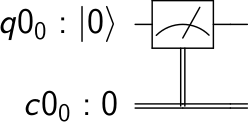

In [4]:
circuit_drawer(circuit)

Ejecutamos el circuito.

In [5]:
job = qiskit.execute( circuit, qiskit.Aer.get_backend('qasm_simulator') )

Lo que hace **qiskit** es que simula el experimento correspondiente una cierta cantidad de veces y nos dice las veces que el estado $|0\rangle$ fue medido y las veces que el estado $|1\rangle$ fue medido. Típicamente, los estados son inicializados en $|0\rangle$, de modo que esperamos que todas las mediciones arrojen este estado y ninguna medición arroje $|1\rangle$.

In [6]:
print( job.result().get_counts() )

{'0': 1024}


Ahora aplicamos la compuerta lógica NOT sobre nuestro _qubit_ en el estado $|0\rangle$. La compuerta NOT opera sobre la base de estados de la manera
$$
\begin{aligned}
 |0\rangle & \longrightarrow |1\rangle, \\
 |1\rangle & \longrightarrow |0\rangle, \\
\end{aligned}
$$
es decir, es una matriz unitaria con la forma
$$
 U_H = \frac{1}{\sqrt{2}}
  \begin{pmatrix}
   0 & 1 \\
   1 & 0
  \end{pmatrix}
$$
si hacemos la asociación
$$
 |0\rangle = 
  \begin{pmatrix}
   1 \\
   0
  \end{pmatrix},
  \qquad\qquad
  |1\rangle = 
  \begin{pmatrix}
   0 \\
   1
  \end{pmatrix}.
$$
Actuando sobre nuestro _qubit_, esperamos que el estado resultante sea $|1\rangle$.

In [7]:
circuit.x(qr[0])

Definimos una medición.

In [8]:
circuit.measure(qr,cr)

Este es nuestro circuito.

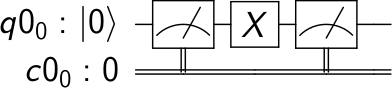

In [9]:
circuit_drawer(circuit)

Ejecutamos y vemos los resultados.

In [10]:
job = qiskit.execute( circuit, qiskit.Aer.get_backend('qasm_simulator') )

In [11]:
print( job.result().get_counts() )

{'1': 1024}


Efectivamente, el estado del _qubit_ fue negado.

Finalmente, aplicamos una compuerta muy importante en la computación cuántica, que es la compuerta de Hadamard (H). Esta compuerta transforma los elementos de la base de estados de la siguiente forma,
$$
\begin{aligned}
 |0\rangle & \longrightarrow \frac{1}{\sqrt{2}}\left(|0\rangle + |1\rangle\right), \\
 |1\rangle & \longrightarrow \frac{1}{\sqrt{2}}\left(|0\rangle - |1\rangle\right), \\
\end{aligned}
$$
es decir, es un operador unitario con la forma
$$
 U_H = \frac{1}{\sqrt{2}}
  \begin{pmatrix}
   1 & 1 \\
   1 & -1
  \end{pmatrix}.
$$
Lo importante de esta compuerta es que genera una superposición de los estados de la base. Esta superposición es equitativa, es decir, al hacer una medición del estado resultante de aplicar H sobre los estados de la base, las probabilidades de medir alguno de estos estados es 1/2 para ambos.

In [12]:
circuit.h(qr[0])

Definimos una medición.

In [13]:
circuit.measure(qr,cr)

Nuestro circuito es el siguiente.

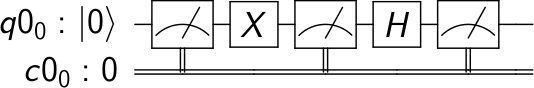

In [14]:
circuit_drawer(circuit)

Ejecutamos y vemos los resultados.

In [15]:
job = qiskit.execute( circuit, qiskit.Aer.get_backend('qasm_simulator') )

In [16]:
print( job.result().get_counts() )

{'0': 512, '1': 512}


Vemos que aproximadamente se ha medido la mitad de las veces al estado $|0\rangle$ y la mitad de las veces al estado $|1\rangle$, 515 y 509 veces, respectivamente, de un total de 1024 veces.

Todos estos resultados son simulados por **qiskit**. **qiskit** ofrece también una interfaz para ejecutar los circuitos cuánticos en una computadora cuántica real de IBM. Pueden probarlo si les interesa. Necesitan primero crear una cuenta en [IBM Q](https://quantumexperience.ng.bluemix.net/qx/experience). Acá hay más documentación de [**qiskit**](https://github.com/Qiskit/qiskit-tutorial).